<a href="https://colab.research.google.com/github/tkasod2/TIL/blob/main/zerobase/homework/%EB%A5%98%EB%B2%94%EC%83%81_3%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3주차 과제**
---
#### 제로베이스(https://zero-base.co.kr/)
#### 바로 써먹는 분석 완주반 
---
#### **Guideline**
- 총점 100점으로 주차별로 약 2~3개 문제가 제시됩니다
- 각 문제마다 안내사항과 요구사항을 꼼꼼하게 확인해주신 후, 코드를 작성해주세요 

#### **Notice!** 
- 제출 기한을 반드시 지켜주세요 
- 제출 전 코드가 정상적으로 실행되는지 검토해주세요
- 총 100점 만점입니다.
- 모두 코드를 입력해야 합니다 (답만 쓰는 경우는 인정되지 않음)
---

# 1. 다음은 클러스터링에 대한 과제입니다 (총 *70점*)

우리는 총 4가지 데이터셋에 대해 아래 그래프와 같이 KMeans, DBSCAN, Hierarchical Clustering 을 각각 수행하려고 합니다. 

우리가 가진 데이터셋의 종류는 총 4가지입니다.
* blobs: 원형 + 3개의 그룹으로 나뉘어 있는 데이터
* anisotropic: 타원형 + 3개의 그룹으로 나뉘어 있는 데이터
* varied: 그룹의 크기가 일정하지 않은 형태의 데이터
* noisy_moons: 2개의 그룹으로 나뉘어 있는 초승달 모양의 데이터

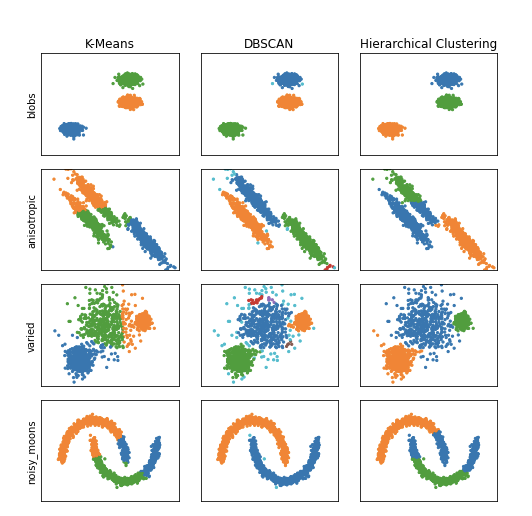

먼저 필요한 패키지를 불러옵니다.

In [ ]:
from sklearn.datasets import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

아래는 데이터셋 준비 과정입니다. 

코드를 이해하지 않아도 괜찮습니다. 

결과물(datasets)의 생김새만 확인하면 됩니다 :)


In [ ]:
# 데이터셋 준비
# 주의: 건드리지 마시오 
np.random.seed(0)
n_samples = 1500
blobs = make_blobs(n_samples=n_samples, random_state=8)
X, y = make_blobs(n_samples=n_samples, random_state=170)
anisotropic = (np.dot(X, [[0.6, -0.6], [-0.4, 0.8]]), y)
varied = make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=170)
noisy_moons = make_moons(n_samples=n_samples, noise=.05)

datasets = {
    "blobs": blobs[0], 
    "anisotropic": anisotropic[0], 
    "varied": varied[0], 
    "noisy_moons": noisy_moons[0]
}

위의 과정을 통해 만들어진 데이터는 다음과 같습니다.  

아래와 같이 datasets 라는 Dictionary 에 각 데이터셋의 이름과 X 좌표들이 각각 key 와 value 로 저장되어 있습니다 

In [ ]:
datasets

{'anisotropic': array([[-3.37561542,  3.63236314],
        [-3.61882807,  3.78627892],
        [-3.48552993,  0.46412084],
        ...,
        [ 1.17962827, -1.54262502],
        [-0.49738132,  0.78227797],
        [ 1.13089877, -1.13033403]]),
 'blobs': array([[ 5.86749807,  8.17715188],
        [ 5.61369982,  9.93295527],
        [ 7.22508428, 10.44886194],
        ...,
        [ 7.73674097, 10.82855388],
        [-4.61701094, -9.64855983],
        [-3.48640175, -9.25766922]]),
 'noisy_moons': array([[-0.37814234,  0.94074979],
        [ 0.93356614,  0.15380501],
        [ 2.04830886,  0.49817159],
        ...,
        [ 1.39084972, -0.43998664],
        [-0.65238917,  0.76964786],
        [-0.90028046,  0.19560292]]),
 'varied': array([[ -6.11119721,   1.47153062],
        [ -7.49665361,   0.9134251 ],
        [-10.84489837,  -7.55352273],
        ...,
        [  1.64990343,  -0.20117787],
        [  0.79230661,   0.60868888],
        [  1.91226342,   0.25327399]])}

**문제 1 - 1. 각 데이터셋의 feature X에 대해 StandardScaler 를 이용하여 정규화를 진행해 주세요. (30점)**
* 정규화한 데이터를 다시 같은 형태로 datasets 에 저장해 주세요
* 각 데이터셋에 정규화를 각각 진행할 때 for 문을 사용해 주세요 (사용하지 않으면 절반의 점수만 인정 됩니다.)
* 기존 datasets 형태에서 오직 X의 값만 바뀌어야 합니다 (아래 참고)

In [ ]:
"""
변경 전)

datasets = {
    "blobs": X, 
    "anisotropic": X, 
    "varied": X, 
    "noisy_moons": X
}

변경 후)
datasets = {
    "blobs": 정규화 후의 X, 
    "anisotropic": 정규화 후의 X, 
    "varied": 정규화 후의 X, 
    "noisy_moons": 정규화 후의 X
}
"""

'\n변경 전)\n\ndatasets = {\n    "blobs": X, \n    "anisotropic": X, \n    "varied": X, \n    "noisy_moons": X\n}\n\n변경 후)\ndatasets = {\n    "blobs": 정규화 후의 X, \n    "anisotropic": 정규화 후의 X, \n    "varied": 정규화 후의 X, \n    "noisy_moons": 정규화 후의 X\n}\n'

In [ ]:
# 코드는 여기에 작성해 주세요
# =====================================================================
S_Scaler = StandardScaler()
for i in datasets.keys():
  new_datasets = S_Scaler.fit_transform(datasets[i])
  datasets[i] = new_datasets

# =====================================================================
# 결과
datasets

{'anisotropic': array([[-0.86704776,  1.51630725],
        [-0.9888373 ,  1.60401212],
        [-0.92208781, -0.2890325 ],
        ...,
        [ 1.41400552, -1.43252398],
        [ 0.57423744, -0.10773901],
        [ 1.38960406, -1.19759078]]),
 'blobs': array([[ 0.43868549,  1.0189435 ],
        [ 0.39707363,  1.24042045],
        [ 0.66127051,  1.30549689],
        ...,
        [ 0.74515992,  1.35339121],
        [-1.28031739, -1.22959089],
        [-1.09494672, -1.18028397]]),
 'noisy_moons': array([[-1.01321277,  1.39018434],
        [ 0.49983903, -0.1921052 ],
        [ 1.78569142,  0.5003038 ],
        ...,
        [ 1.02731427, -1.38602672],
        [-1.32955566,  1.0461541 ],
        [-1.61549752, -0.10806322]]),
 'varied': array([[-0.48048347,  1.03326895],
        [-0.77355413,  0.85116829],
        [-1.4818206 , -1.91145773],
        ...,
        [ 1.16125055,  0.48749165],
        [ 0.97983996,  0.75173786],
        [ 1.21674852,  0.63577182]])}

In [ ]:
# 결과 :) 
datasets

{'anisotropic': array([[-0.86704776,  1.51630725],
        [-0.9888373 ,  1.60401212],
        [-0.92208781, -0.2890325 ],
        ...,
        [ 1.41400552, -1.43252398],
        [ 0.57423744, -0.10773901],
        [ 1.38960406, -1.19759078]]),
 'blobs': array([[ 0.43868549,  1.0189435 ],
        [ 0.39707363,  1.24042045],
        [ 0.66127051,  1.30549689],
        ...,
        [ 0.74515992,  1.35339121],
        [-1.28031739, -1.22959089],
        [-1.09494672, -1.18028397]]),
 'noisy_moons': array([[-1.01321277,  1.39018434],
        [ 0.49983903, -0.1921052 ],
        [ 1.78569142,  0.5003038 ],
        ...,
        [ 1.02731427, -1.38602672],
        [-1.32955566,  1.0461541 ],
        [-1.61549752, -0.10806322]]),
 'varied': array([[-0.48048347,  1.03326895],
        [-0.77355413,  0.85116829],
        [-1.4818206 , -1.91145773],
        ...,
        [ 1.16125055,  0.48749165],
        [ 0.97983996,  0.75173786],
        [ 1.21674852,  0.63577182]])}

문제 1 - 2. 각 데이터셋의 feature X에 대해 클러스터링을 진행하려고 합니다. 다음 코드를 완성해 주세요. (40점)

In [ ]:
# 다음 코드가 정상 작동하도록, 코드를 채워주세요
results = {}
for data_name, X in datasets.items():


    # 클러스터링 별 파라미터 설정 
    # n_clusters는 KMEANS에서 사용할 초기 클러스터링 군집수입니다.
    if data_name in ["noisy_moons", "noisy_circles"]:
        n_clusters = 2
    else:
        n_clusters = 3

    # DBSCAN에서 사용할 최소 거리 eps 입니다.
    eps=0.15

    # Start - 이 사이에 코드를 넣어 results 에 클러스터링 결과값을 넣어주세요!
    # ===========================================================

    # 1. KMeans 클러스터링을 수행합니다. 
    # 아래의 코드를 보고 저장되는 변수 이름을 잘 확인해 주세요
    kmeans_prediction = KMeans(n_clusters = n_clusters)
    kmeans_prediction = kmeans_prediction.fit_predict(datasets[data_name])


    # 2. 계층 클러스터링을 수행합니다.
    # 아래의 코드를 보고 저장되는 변수 이름을 잘 확인해 주세요
    ward_prediction = AgglomerativeClustering(n_clusters = n_clusters)
    ward_prediction = ward_prediction.fit_predict(datasets[data_name])


    # 3. DBSCAN 클러스터링을 수행합니다.
    # 아래의 코드를 보고 저장되는 변수 이름을 잘 확인해 주세요
    dbscan_prediction = DBSCAN(eps = eps)
    dbscan_prediction = dbscan_prediction.fit_predict(datasets[data_name])


    # ===========================================================
    # End 


    results[data_name + "-" + "KMeans"] = (X, kmeans_prediction)
    results[data_name + "-" + "DBSCAN"] = (X, dbscan_prediction)
    results[data_name + "-" + "Hierarchical"] = (X, ward_prediction)

In [ ]:
results

{'anisotropic-DBSCAN': (array([[-0.86704776,  1.51630725],
         [-0.9888373 ,  1.60401212],
         [-0.92208781, -0.2890325 ],
         ...,
         [ 1.41400552, -1.43252398],
         [ 0.57423744, -0.10773901],
         [ 1.38960406, -1.19759078]]), array([0, 0, 1, ..., 2, 2, 2])),
 'anisotropic-Hierarchical': (array([[-0.86704776,  1.51630725],
         [-0.9888373 ,  1.60401212],
         [-0.92208781, -0.2890325 ],
         ...,
         [ 1.41400552, -1.43252398],
         [ 0.57423744, -0.10773901],
         [ 1.38960406, -1.19759078]]), array([2, 2, 0, ..., 1, 1, 1])),
 'anisotropic-KMeans': (array([[-0.86704776,  1.51630725],
         [-0.9888373 ,  1.60401212],
         [-0.92208781, -0.2890325 ],
         ...,
         [ 1.41400552, -1.43252398],
         [ 0.57423744, -0.10773901],
         [ 1.38960406, -1.19759078]]),
  array([2, 2, 1, ..., 0, 1, 0], dtype=int32)),
 'blobs-DBSCAN': (array([[ 0.43868549,  1.0189435 ],
         [ 0.39707363,  1.24042045],
         [

In [ ]:
# results 는 다음과 같이 
# key 에는 데이터셋 이름과 클러스터링 종류가 "-" 로 연결되어 있고
# value 에는 (X, prediction) 값이 tuple 로 들어있습니다.
results

{'anisotropic-DBSCAN': (array([[-0.86704776,  1.51630725],
         [-0.9888373 ,  1.60401212],
         [-0.92208781, -0.2890325 ],
         ...,
         [ 1.41400552, -1.43252398],
         [ 0.57423744, -0.10773901],
         [ 1.38960406, -1.19759078]]), array([0, 0, 1, ..., 2, 2, 2])),
 'anisotropic-Hierarchical': (array([[-0.86704776,  1.51630725],
         [-0.9888373 ,  1.60401212],
         [-0.92208781, -0.2890325 ],
         ...,
         [ 1.41400552, -1.43252398],
         [ 0.57423744, -0.10773901],
         [ 1.38960406, -1.19759078]]), array([2, 2, 0, ..., 1, 1, 1])),
 'anisotropic-KMeans': (array([[-0.86704776,  1.51630725],
         [-0.9888373 ,  1.60401212],
         [-0.92208781, -0.2890325 ],
         ...,
         [ 1.41400552, -1.43252398],
         [ 0.57423744, -0.10773901],
         [ 1.38960406, -1.19759078]]),
  array([2, 2, 1, ..., 0, 1, 0], dtype=int32)),
 'blobs-DBSCAN': (array([[ 0.43868549,  1.0189435 ],
         [ 0.39707363,  1.24042045],
         [

그럼 문제 끝!! 아래 코드는 시각화를 진행하는 코드입니다 :) 

여러분이 만들어준 데이터셋과 알고리즘 덕에 다음과 같은 시각화 결과물이 완성되었습니다

각 클러스터링 방식과 특성에 따라 조금씩 다른 결과물이 나오는 것을 확인할 수 있을 거에요 :) 

그럼 다음 문제를 풀러 가볼까요?

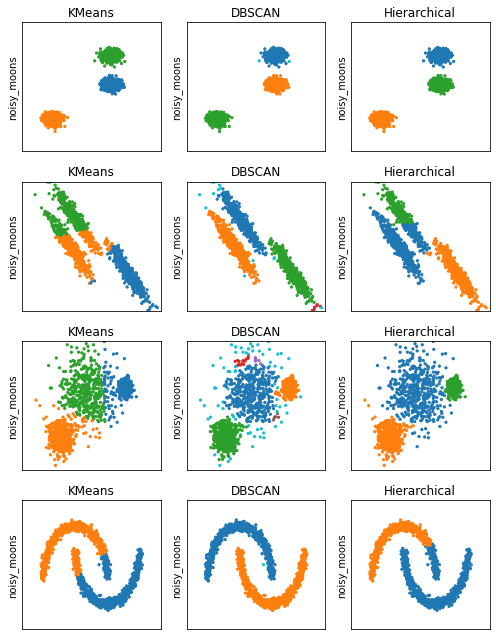

In [ ]:
# 시각화 코드 수정하지 마세요! 그냥 돌려보세요 # 
plt.figure(figsize=(7, 9))
plot_num = 1
for i, items in enumerate(results.items()):

      full_name, result = items

      plt.subplot(4, 3, plot_num)

      plt.title(full_name.split("-")[1])
      plt.ylabel(data_name)
      
      colors = plt.cm.tab10(np.arange(20, dtype=int))
      plt.scatter(result[0][:, 0], result[0][:, 1], s=5, color=colors[result[1]])
      plt.xlim(-2.5, 2.5)
      plt.ylim(-2.5, 2.5)
      plt.xticks(())
      plt.yticks(())
      plot_num += 1

plt.tight_layout()
plt.show()

# 2. 다음은 Markov Chain 대한 과제입니다 (총 *30점*)

우리는 제로베이스의 분석가가 되었습니다. 그리고 바로 써먹는 분석을 런칭했습니다. 

사이트에서 "바로 써먹는 분석"을 구매하는 유저들의 사이트 내 구매 과정을 Markov Chain 을 통해 분석하려고 합니다.



---


각 상태(State)의 종류는 아래와 같습니다.

* Start: 상태 시작
* Home: 메인 페이지 방문 (https://zero-base.co.kr/)
* Da_challenge: 바로 써먹는 분석 페이지 방문 (https://zero-base.co.kr/category_data_camp/da_challenge)
* Conversion: 구매 완료
* Null: 이탈

그리고 각 상태에서 다른 상태로의 전이확률은 다음과 같이 transition_probability에 저장되어 있습니다.

예를 들어 Home->Da_challenge의 값(**transition_probability["Home->Da_challenge"]**)은 **메인 페이지에 방문해서 바로 써먹는 분석 페이지로 갈 확률**을 의미합니다.

In [ ]:
# 수정하지 마시오

transition_probability = {

  'Start->Null': 0.6,
  'Start->Home': 0.3, # 과제에 0.7로 나와있었는데 0.3으로 수정 ('Start->Home': 0.7 -> 0.3)
  'Start->Da_challenge': 0.1, # 과제에 0.3으로 나와있었는데 0.1로 수정 ( 'Start->Da_challenge': 0.3 -> 0.1)

  'Home->Da_challenge': 0.1,
  'Home->Null': 0.9,


  'Da_challenge->Home': 0.2,
  'Da_challenge->Conversion': 0.1,
  'Da_challenge->Null': 0.7,
}

**문제. 다음 코드를 완성하여 전이 확률 행렬을 DataFrame 형태로 표현하시오. (총 30점)**


* 유저가 Conversion 이나 Null 상태로 진입한 경우 자기 자신에 머무를 확률은 1, 나머지 상태로 갈 확률은 0입니다. 
  * 즉, 유저는 전환이나 이탈한 후에는 다른 상태로 전환할 수 없습니다.

In [ ]:
import seaborn as sns 
import pandas as pd

In [ ]:
list_of_states = ["Start","Home","Da_challenge", "Conversion" ,"Null"]
trans_matrix = pd.DataFrame()


# 아래에 코드를 완성해 주세요 :)
# =====================================================================

for channel in list_of_states:
  trans_matrix[channel] = 0.0
  trans_matrix.loc[channel] = 0

  if channel in ['Conversion', 'Null']:
    trans_matrix[channel][channel] = 1

for key, value in transition_probability.items():
  a,b = key.split('->')
  trans_matrix.loc[a,b] = value
trans_matrix


# =====================================================================


,Start,Home,Da_challenge,Conversion,Null
Start,0.0,0.3,0.1,0.0,0.6
Home,0.0,0.0,0.1,0.0,0.9
Da_challenge,0.0,0.2,0.0,0.1,0.7
Conversion,0.0,0.0,0.0,1.0,0.0
Null,0.0,0.0,0.0,0.0,1.0


In [ ]:
trans_matrix

,Start,Home,Da_challenge,Conversion,Null
Start,0.0,0.3,0.1,0.0,0.6
Home,0.0,0.0,0.1,0.0,0.9
Da_challenge,0.0,0.2,0.0,0.1,0.7
Conversion,0.0,0.0,0.0,1.0,0.0
Null,0.0,0.0,0.0,0.0,1.0


다음은 여러분이 만든 매트릭스를 시각화한 결과입니다 :) 

홈페이지에 들어온 유저들의 90%는 대부분 이탈하네요! 

지표를 개선하여 이탈하는 확률을 낮출 수 있으면 좋을 것 같습니다 

**바로 써먹는 분석 페이지에 들어온 유저 중 10%가 구매를 하는군요 :)**

**그 유저가 바로 여러분 입니다 :)**

그럼 과제를 마치느라 수고하셨습니다!

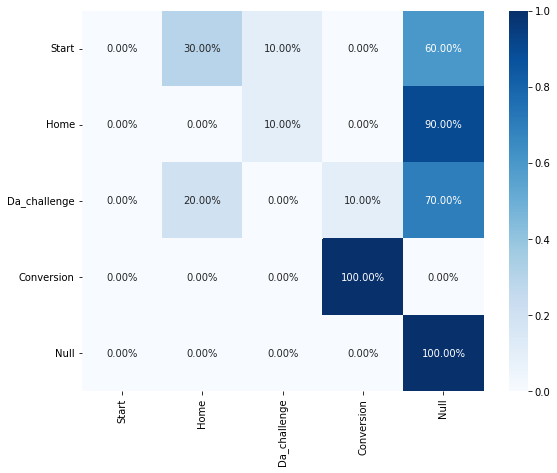

In [ ]:
g = sns.heatmap(trans_matrix, annot=True, fmt='.2%', cmap="Blues")
g.figure.set_size_inches(9, 7)